In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
customers = pd.read_csv("Downloads/Customers.csv")
products = pd.read_csv("Downloads/Products.csv")
transactions = pd.read_csv("Downloads/Transactions.csv")

In [4]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [5]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Quantity': 'sum'
}).reset_index()
customer_features.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'TransactionCount', 'Quantity']])

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

In [8]:
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8650620583623065


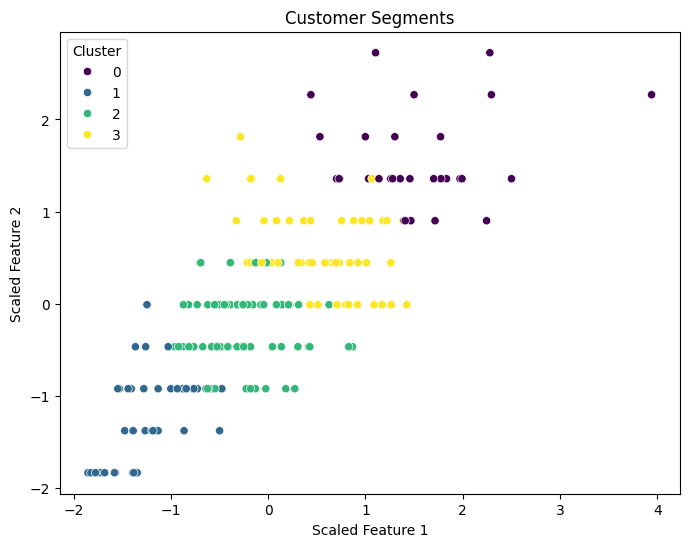

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_features['Cluster'], 
    palette='viridis'
)
plt.title("Customer Segments")
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.legend(title='Cluster')
plt.show()